In [1]:
%run twisted_graphene.py

In [2]:
g=TwistedBilayerGraphene(1,0)

In [3]:
radius=0.01
versor=lambda pi,pf: (pf-pi)/np.linalg.norm(pf-pi)
g.set_kpath([g.K[0]+versor(g.K[0],g.M[0])*radius,g.K[0],g.K[0]+versor(g.K[0],g.Gamma)*radius],[100,100])

In [4]:
def t_intra(x1,y1,x2,y2):
    """
    Intralayer hoppings of graphene.
    
    (x1,y1) and (x2,y2) are the initial and final positions, respectively.
    """
    a=2.46 #Angstrom. Lattice constant of graphene
    x=x2-x1
    y=y2-y1
    r=np.sqrt(x**2+y**2)/a
    t=np.zeros_like(r)
    t[(0.3  < r) * (r < 0.8 )] = -2.8922   #1st neighbors = 0.5774
    return t

In [5]:
g.calc_hops(1.5,t_intra)

In [6]:
g.set_hamiltonian(0.0,0.0)

In [7]:
g.calc_bands(4,0.0)

In [8]:
Ktick=g.kticks[1]
band1=np.concatenate((g.bands[0:Ktick,0],g.bands[Ktick::,2]))
band2=np.concatenate((g.bands[0:Ktick,2],g.bands[Ktick::,0]))

In [9]:
def linear_fit_with_R2(x,y):
    p,residuals,rank,singular_values,rcond=np.polyfit(x,y,1,full=True)
    m,b=p
    R2=(np.corrcoef(y,m*x+b)[0,1])**2
    return m,b,R2

m1,b1,R21=linear_fit_with_R2(g.ell,band1)
m2,b2,R22=linear_fit_with_R2(g.ell,band2)

In [10]:
m1,b1,R21 #b should be close to zero, R2 should be close to 1

(6.161295933314082, -0.06154003724744721, 0.9999966373198478)

In [11]:
m2,b2,R22 #b should be close to zero, R2 should be close to 1

(-6.161295933314082, 0.06154003724744721, 0.9999966373198478)

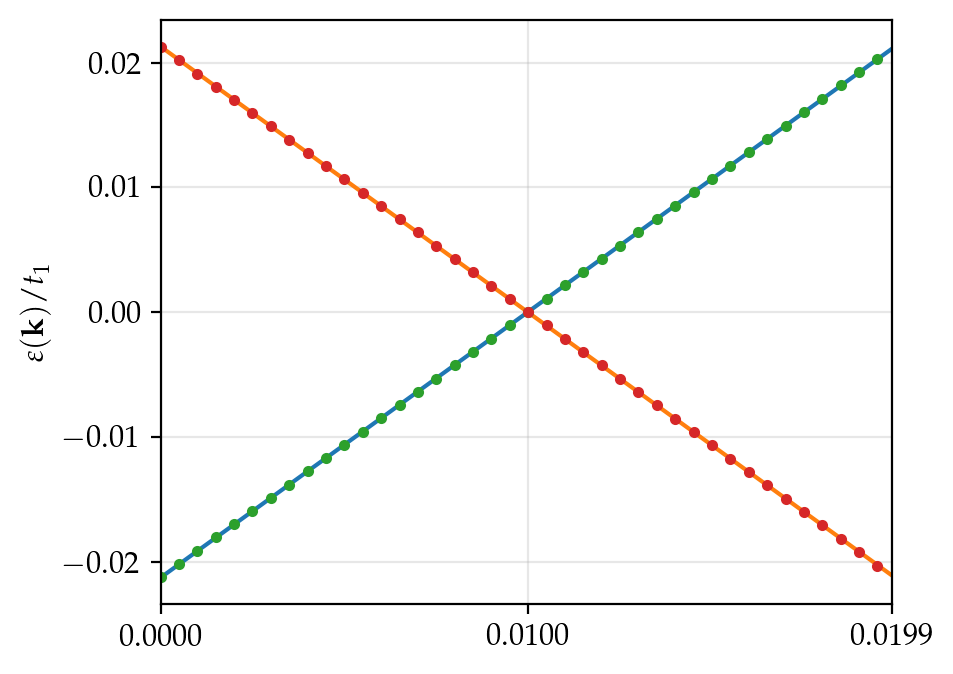

In [18]:
plt.figure(figsize=(4.9,3.5))

plt.plot(g.ell,(m1*g.ell+b1)/2.8922)
plt.plot(g.ell,(m2*g.ell+b2)/2.8922)
plt.plot(g.ell[::5],band1[::5]/2.8922,'.')
plt.plot(g.ell[::5],band2[::5]/2.8922,'.')

plt.grid(True,alpha=0.3)
plt.xticks(g.ell[g.kticks],['$\mathbf{M}\leftarrow$','$\mathbf{K}$','$\\rightarrow\mathbf{\Gamma}$'])
plt.xlim((g.ell[0],g.ell[-1]))
plt.ylabel('$\\varepsilon(\mathbf{k})/t_1$')

plt.savefig('Fig10_graphene_monolayer_dirac_cone_linear_fit.svg')

plt.show()

$$
\varepsilon_1(\mathbf{k})\approx m_1 |\mathbf{k}-\mathbf{K}|
$$

In [13]:
from scipy import constants
constants.hbar #Js

1.0545718176461565e-34

$$
m=\hbar v_F
$$

$$
[m] = eV/A^{-1} = eV A = e 10^{-10} V m
$$

$$
[v_F] = e 10^{-10} V m / Js = e_{adim} 10^{-10} m / s
$$

In [14]:
vfermi = m1/constants.hbar * constants.e * 1e-10
vfermi/constants.c #0.003

0.0031223788652585257

In [15]:
vfermi

936065.6348231043

In [16]:
vfermi2 = m2/constants.hbar * constants.e * 1e-10
vfermi2/constants.c #0.003

-0.0031223788652585257

In [17]:
vfermi2

-936065.6348231043

In [20]:
m1*0.0100

0.06161295933314082

In [21]:
b1

-0.06154003724744721

$$
\varepsilon(\mathbf{k})=m(\ell(\mathbf{k})-\ell(\mathbf{K})) \implies b = -m\ell(\mathbf{K})
$$